In [4]:
''' import some cheeky modules '''
# standard modules
import os
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

# scikit-learn support vector machines (classifier) and performance metrics
from sklearn import svm, metrics

In [7]:
a=[]

for filename in os.listdir('./fen_diagrams/unaffected/'):
    if filename.endswith(".png"): 
        a.append(matplotlib.pyplot.imread('./fen_diagrams/unaffected/'+filename))
        continue
    else:
        continue
        
dataset = np.stack(a)

In [17]:
#Affected fen diagram datasets for each example diagram (train1 - train5)

In [11]:
train1=[]

for train1_file in os.listdir('./fen_diagrams/affected/train1/'):
    if train1_file.endswith(".png"):
        train1.append(matplotlib.pyplot.imread('./fen_diagrams/affected/train1/' + train1_file))
        continue
    else:
        continue
        
train1_affected = np.stack(train1)

In [14]:
train2=[]

for train2_file in os.listdir('./fen_diagrams/affected/train2/'):
    if train2_file.endswith(".png"):
        train2.append(matplotlib.pyplot.imread('./fen_diagrams/affected/train2/' + train2_file))
        continue
    else:
        continue

train2_affected = np.stack(train2)

In [15]:
train3=[]

for train3_file in os.listdir('./fen_diagrams/affected/train3/'):
    if train3_file.endswith(".png"):
        train3.append(matplotlib.pyplot.imread('./fen_diagrams/affected/train3/' + train3_file))
        continue
    else:
        continue
        
train3_affected = np.stack(train3)

In [16]:
train4=[]

for train4_file in os.listdir('./fen_diagrams/affected/train4/'):
    if train4_file.endswith(".png"):
        train4.append(matplotlib.pyplot.imread('./fen_diagrams/affected/train4/' + train4_file))
        continue
    else:
        continue
        
train4_affected = np.stack(train4)

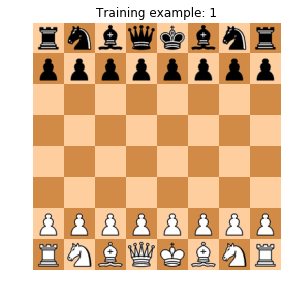

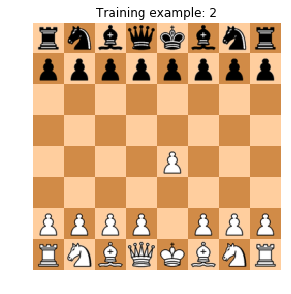

In [8]:
# plot a subset of the training examples
Nplots = 2 # how many to plot?

for i in range(0,Nplots):
    plt.figure(figsize=(Nplots*5, Nplots*5))
    plt.subplot(Nplots,Nplots,i+1)
    plt.axis('off')
    plt.imshow(dataset[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training example: %i' % (i+1))

In [4]:
# train1 = dataset[0]

In [5]:
# train1_columns=np.stack(np.split(train1,8,axis=0))

In [6]:
# train1_squares=np.stack(np.split(train1_columns,8,axis=2))

In [7]:
# train1_reshape=train1_squares.reshape(64,900,4)

In [8]:
# train1_reshape.shape

In [40]:
# piece key: 0,1,2,3,4,5,6 = empty, pawn, rook, knight, bishop, queen, king
train1_validate=np.array((2,1,0,0,0,0,1,2, \
                          3,1,0,0,0,0,1,3, \
                          4,1,0,0,0,0,1,4, \
                          5,1,0,0,0,0,1,5, \
                          6,1,0,0,0,0,1,6, \
                          4,1,0,0,0,0,1,4, \
                          3,1,0,0,0,0,1,3, \
                          2,1,0,0,0,0,1,2))

In [41]:
temp = []
for i in range(0,dataset.shape[0]):
    columns = np.stack(np.split(dataset[i],8,axis=0))
    squares = np.stack(np.split(columns,8,axis=2))
    reshape = squares.reshape(64,900*4)
    temp.append(reshape)

dataset_flat = np.stack(temp)

In [ ]:
# Reshaping all train1_affected fen diagrams

In [27]:
fen = []

for i in range(0, train1_affected.shape[0]):
    columns = np.stack(np.split(train1_affected[i],8,axis=0))
    squares = np.stack(np.split(columns,8,axis=2))
    reshape = squares.reshape(64,900*4)
    fen.append(reshape)
        
train1_affected_flat = np.stack(fen)

In [32]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.01, verbose=True)
# gamma is a hyperparameter :D

In [77]:
# # We learn the digits on the first half of the digits
n_samples = dataset.shape[0]

classifier.fit(dataset_flat[0], train1_validate)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [36]:
# Learning them digits on affected examples (train1)

for i in range(len(train1_affected_flat)):
    classifier.fit(train1_affected_flat[i], train1_validate)


NameError: name 'train1_validate' is not defined

In [78]:
predicted = classifier.predict(dataset_flat[1])

In [79]:
predicted # picking out the ends of each row, but POUR QUOI

array([2, 1, 0, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 4, 1, 0, 0, 0, 0, 1,
       4, 5, 1, 0, 0, 0, 0, 1, 5, 6, 1, 0, 0, 1, 0, 0, 6, 4, 1, 0, 0, 0, 0,
       1, 4, 3, 1, 0, 0, 0, 0, 1, 3, 2, 1, 0, 0, 0, 0, 1, 2])

In [80]:
for i in range(0,len(predicted)):
    if (i+1)%8==0:
        print predicted[i-7:i+1]
    

[2 1 0 0 0 0 1 2]
[3 1 0 0 0 0 1 3]
[4 1 0 0 0 0 1 4]
[5 1 0 0 0 0 1 5]
[6 1 0 0 1 0 0 6]
[4 1 0 0 0 0 1 4]
[3 1 0 0 0 0 1 3]
[2 1 0 0 0 0 1 2]
